In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()

'/Users/jaytreon/Desktop/2021Apps/Internship - Covid/covid_data'

In [3]:
os.chdir('/Users/jaytreon/Desktop/2021Apps/Internship - Covid/covid_data')

In [4]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [5]:
output_notebook()

Loading BokehJS ...

In [6]:
# uploading csv files data = pd.read_csv('file1.csv', on_bad_lines='skip')


ethn_df = pd.read_csv("ethnicdata.csv",on_bad_lines='skip')
Fcases_ltla_df = pd.read_csv("cum_cases_ltla.csv",on_bad_lines='skip')
Fdeaths_ltla_df = pd.read_csv("cum_deaths_ltla.csv",on_bad_lines='skip')

In [7]:
#sorting to useful columns of area code and the metric being used
ethn_percs_df = ethn_df[['areaCode','Perc_NonWhite']]
cases_ltla_df = Fcases_ltla_df[['areaCode','cumCasesBySpecimenDate']]
deaths_ltla_df = Fdeaths_ltla_df[['areaCode','cumDeaths28DaysByDeathDateRate']]

cases_ltla_df.tail()

,areaCode,cumCasesBySpecimenDate
364,E07000071,66946
365,E07000084,60176
366,E07000116,38764
367,E07000176,42778
368,E09000017,104006


In [8]:
p_scatter = figure(plot_width=800, plot_height=400)

p_scatter.circle(ethn_percs_df['areaCode'],ethn_percs_df['Perc_NonWhite'],color='firebrick',alpha=0.8)


GlyphRenderer(id='1038', ...)

<AxesSubplot:xlabel='Perc_NonWhite', ylabel='Count'>

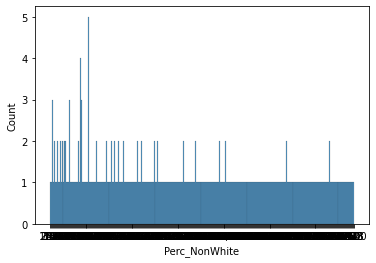

In [9]:
import seaborn as sns

%matplotlib inline

sns.histplot(ethn_percs_df['Perc_NonWhite'])

<AxesSubplot:xlabel='cumCasesBySpecimenDate', ylabel='Count'>

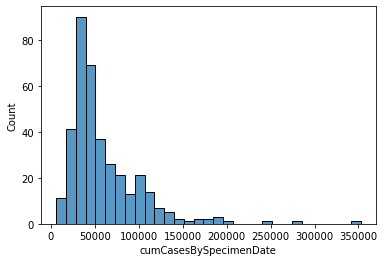

In [10]:
sns.histplot(cases_ltla_df['cumCasesBySpecimenDate'])

<AxesSubplot:xlabel='cumDeaths28DaysByDeathDateRate', ylabel='Count'>

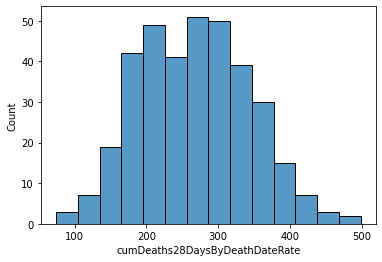

In [11]:
sns.histplot(deaths_ltla_df['cumDeaths28DaysByDeathDateRate'])

In [12]:
m_cases_df = pd.merge_ordered(ethn_percs_df, cases_ltla_df, fill_method="ffill", right_by="areaCode")
print(m_cases_df)

      areaCode Perc_NonWhite  cumCasesBySpecimenDate
0    E06000003          1.48                   48876
1    E07000040          3.60                   43770
2    E07000090          4.84                   40731
3    E07000214         12.50                   32243
4    E07000229         11.01                   36177
..         ...           ...                     ...
364  E07000071         13.30                   66946
365  E07000084         16.48                   60176
366  E07000116         11.02                   38764
367  E07000176          6.14                   42778
368  E09000017         54.18                  104006

[369 rows x 3 columns]


In [13]:
m_deaths_df = pd.merge_ordered(ethn_percs_df, deaths_ltla_df, fill_method="ffill", right_by="areaCode")

In [14]:
print(m_deaths_df)

      areaCode Perc_NonWhite  cumDeaths28DaysByDeathDateRate
0    E06000003          1.48                           318.4
1    E07000040          3.60                           199.2
2    E07000090          4.84                           316.6
3    E07000214         12.50                           293.7
4    E07000229         11.01                           234.8
..         ...           ...                             ...
353  E07000071         13.30                           248.5
354  E07000084         16.48                           204.2
355  E07000116         11.02                           216.1
356  E07000176          6.14                           237.2
357  E09000017         54.18                           245.0

[358 rows x 3 columns]


In [15]:
p_scatter2 = figure(plot_width=800, plot_height=300, y_range=(0, 200000), x_range = (0,100))

p_scatter2.scatter(m_cases_df['Perc_NonWhite'],m_cases_df['cumCasesBySpecimenDate'], color='firebrick', alpha=0.6)

p_scatter2.yaxis.axis_label = 'Cumulative Cases'
p_scatter2.xaxis.axis_label = 'Percentage of Ethnic Population within LTLA'

show(p_scatter2)

In [49]:
p_scatter3 = figure(plot_width=800, plot_height=400, y_range=(0, 600), x_range = (0,100))

p_scatter3.scatter(m_deaths_df['Perc_NonWhite'],m_deaths_df['cumDeaths28DaysByDeathDateRate'], color='firebrick', alpha=0.6)

p_scatter3.yaxis.axis_label = 'Cumulative Deaths'
p_scatter3.xaxis.axis_label = 'Percentage of Ethnic Population within LTLA'

show(p_scatter3)
# age demographics - higher ethnic minority ltlas might have a younger average age - can also plot this as a reason to
# scatter doesnt show ineeqaulity

In [17]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
import numpy as np
import pandas as pd
import geopandas as gpd

In [18]:
shapefile = 'Local_Authority_Districts_(December_2020)_UK_BGC.shp'
gdf = gpd.read_file(shapefile)
gdf

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E06000001,Hartlepool,None,447160,531474,-1.27018,54.676140,9.377020e+07,68482.701053,"POLYGON ((447097.001 537152.001, 447228.798 53..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.385812e+07,42570.770613,"MULTIPOLYGON (((449862.750 521262.400, 449853...."
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.567520,2.451392e+08,94691.669222,"MULTIPOLYGON (((455939.672 527395.073, 456154...."
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.556911,2.049030e+08,118321.073248,"MULTIPOLYGON (((444126.099 528005.799, 444165...."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535339,1.974858e+08,105777.871675,"POLYGON ((423475.701 524731.597, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...,...
374,375,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.698360,1.262231e+08,78980.290566,"POLYGON ((323825.299 211337.105, 324481.004 21..."
375,376,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.778271,8.503214e+08,218882.426426,"MULTIPOLYGON (((327822.001 231019.601, 327871...."
376,377,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.582310,1.904458e+08,148229.838483,"MULTIPOLYGON (((342366.297 194712.104, 342355...."
377,378,W06000023,Powys,Powys,302329,273255,-3.43531,52.348640,5.195418e+09,589999.998341,"MULTIPOLYGON (((270878.107 297590.695, 270480...."


<AxesSubplot:>

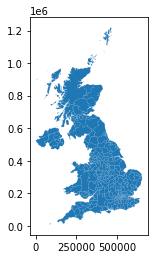

In [19]:
gdf.plot()

In [20]:
geo_cases_df = pd.merge_ordered(gdf, m_cases_df, fill_method="ffill", left_on='LAD20CD', right_on='areaCode')
geo_deaths_df = pd.merge_ordered(gdf, m_deaths_df, fill_method="ffill", left_on='LAD20CD', right_on='areaCode')


In [21]:
print(m_cases_df)

      areaCode Perc_NonWhite  cumCasesBySpecimenDate
0    E06000003          1.48                   48876
1    E07000040          3.60                   43770
2    E07000090          4.84                   40731
3    E07000214         12.50                   32243
4    E07000229         11.01                   36177
..         ...           ...                     ...
364  E07000071         13.30                   66946
365  E07000084         16.48                   60176
366  E07000116         11.02                   38764
367  E07000176          6.14                   42778
368  E09000017         54.18                  104006

[369 rows x 3 columns]


In [22]:
print(geo_deaths_df)
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
#check where data is missing - could be missing Wales data

     OBJECTID    LAD20CD               LAD20NM        LAD20NMW   BNG_E  \
0           1  E06000001            Hartlepool            None  447160   
1           2  E06000002         Middlesbrough            None  451141   
2           3  E06000003  Redcar and Cleveland            None  464361   
3           4  E06000004      Stockton-on-Tees            None  444940   
4           5  E06000005            Darlington            None  428029   
..        ...        ...                   ...             ...     ...   
378       375  W06000020               Torfaen         Torfaen  327459   
379       376  W06000021         Monmouthshire       Sir Fynwy  337812   
380       377  W06000022               Newport       Casnewydd  337897   
381       378  W06000023                 Powys           Powys  302329   
382       379  W06000024        Merthyr Tydfil  Merthyr Tudful  305916   

      BNG_N     LONG        LAT    Shape__Are     Shape__Len  \
0    531474 -1.27018  54.676140  9.377020e+07  

<AxesSubplot:>

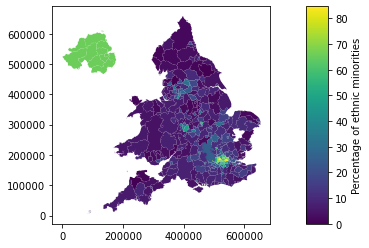

In [50]:
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="10%", pad=0.5)

pd.to_numeric(geo_cases_df['Perc_NonWhite'])


geo_cases_df['Perc_NonWhite'] = pd.to_numeric(geo_cases_df['Perc_NonWhite'])

geo_cases_df.plot(column='Perc_NonWhite', ax=ax, legend=True, cax=cax,
                  legend_kwds={'label':'Percentage of ethnic minorities','orientation':'vertical'})

<AxesSubplot:>

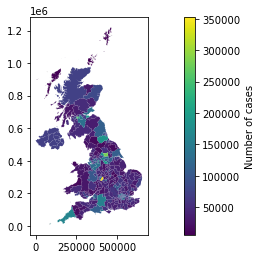

In [24]:
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="10%", pad=0.5)

geo_cases_df.head 

geo_cases_df.plot(column='cumCasesBySpecimenDate', ax=ax, legend=True, cax=cax,
                          legend_kwds={'label': 'Number of cases', 'orientation':'vertical'})

<AxesSubplot:>

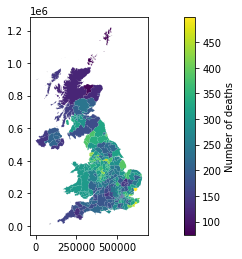

In [25]:
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="10%", pad=0.5)

geo_cases_df.head 

geo_deaths_df.plot(column='cumDeaths28DaysByDeathDateRate', ax=ax, legend=True, cax=cax,
                          legend_kwds={'label': 'Number of deaths', 'orientation':'vertical'})

In [26]:
# model results sent to me, LTLA fitted (debiased prevalenc)
# total_pr is the overall spatial distribution effect
# exp_frc is the spatial effect due to particular covariates for the LTLA
# unxp_fr is the difference between total_pr and exp_frc

shapefile_dbp = 'ltla_fitted.shx'
gdf_dbp = gpd.read_file(shapefile_dbp)
gdf_dbp

,lad20cd,FID,LAD20NM,RGN20CD,RGN20NM,LTLA_ID,totl_pr,exp_frc,unxp_fr,geometry
0,E06000001,54.0,Hartlepool,E12000001,North East,1,0.330147,0.130402,0.199744,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,55.0,Middlesbrough,E12000001,North East,2,0.375032,0.248762,0.126270,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,56.0,Redcar and Cleveland,E12000001,North East,3,0.246772,0.024796,0.221976,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,57.0,Stockton-on-Tees,E12000001,North East,4,0.251531,0.097186,0.154345,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,58.0,Darlington,E12000001,North East,5,0.221544,0.083805,0.137739,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...
306,E09000029,110.0,Sutton,E12000007,London,307,0.290253,0.511273,-0.221020,"POLYGON ((527085.942 167617.691, 527087.729 16..."
307,E09000030,111.0,Tower Hamlets,E12000007,London,308,-0.196058,0.306341,-0.502399,"POLYGON ((536776.386 184446.881, 536777.600 18..."
308,E09000031,112.0,Waltham Forest,E12000007,London,309,-0.079467,0.148808,-0.228275,"POLYGON ((537921.098 196048.201, 537947.499 19..."
309,E09000032,113.0,Wandsworth,E12000007,London,310,0.014912,0.337831,-0.322920,"POLYGON ((530059.620 177871.478, 530066.940 17..."


<AxesSubplot:>

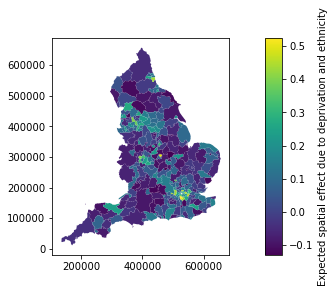

In [52]:

ig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="10%", pad=0.5)


gdf_dbp.plot(column='exp_frc', ax=ax, legend=True, cax=cax,
                          legend_kwds={'label': 'Expected spatial effect due to deprivation and ethnicity', 'orientation':'vertical'})




In [38]:
#we can create a pseudo data set, where you see the multiplier as time
# have a slider with 0 and 1
# 0 there is a spatial effect no covarience
# stats for each LTLA if possible
# slider instead of year is a multiplier from 0 to 1

import math

import geopandas
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter, Column
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

In [39]:
gdf_dbp

,lad20cd,FID,LAD20NM,RGN20CD,RGN20NM,LTLA_ID,totl_pr,exp_frc,unxp_fr,geometry
0,E06000001,54.0,Hartlepool,E12000001,North East,1,0.330147,0.130402,0.199744,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,55.0,Middlesbrough,E12000001,North East,2,0.375032,0.248762,0.126270,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,56.0,Redcar and Cleveland,E12000001,North East,3,0.246772,0.024796,0.221976,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,57.0,Stockton-on-Tees,E12000001,North East,4,0.251531,0.097186,0.154345,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,58.0,Darlington,E12000001,North East,5,0.221544,0.083805,0.137739,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...
306,E09000029,110.0,Sutton,E12000007,London,307,0.290253,0.511273,-0.221020,"POLYGON ((527085.942 167617.691, 527087.729 16..."
307,E09000030,111.0,Tower Hamlets,E12000007,London,308,-0.196058,0.306341,-0.502399,"POLYGON ((536776.386 184446.881, 536777.600 18..."
308,E09000031,112.0,Waltham Forest,E12000007,London,309,-0.079467,0.148808,-0.228275,"POLYGON ((537921.098 196048.201, 537947.499 19..."
309,E09000032,113.0,Wandsworth,E12000007,London,310,0.014912,0.337831,-0.322920,"POLYGON ((530059.620 177871.478, 530066.940 17..."


In [40]:
# q1exp_frc.df = 0.25 * gdf_dbp('exp_frc')

tot_exp_frc = gdf_dbp["exp_frc"].astype(float)

q0exp_frc = 0 * tot_exp_frc
q1exp_frc = tot_exp_frc / 4
q2exp_frc = 0.5 * tot_exp_frc
q3exp_frc = 0.75 * tot_exp_frc
q4exp_frc = 1 * tot_exp_frc

#gdf_dbp_df = pd.DataFrame(gdf_dbp)
gdf_dbp_df = gdf_dbp.copy()

gdf_dbp_df['qexp0'] = q0exp_frc
gdf_dbp_df['qexp1'] = q1exp_frc
gdf_dbp_df['qexp2'] = q2exp_frc
gdf_dbp_df['qexp3'] = q3exp_frc
gdf_dbp_df['qexp4'] = q4exp_frc
#gdf_dbp_df.insert(9, 'qexp0', q0exp_frc, True)
#gdf_dbp_df.insert(9, 'qexp1', q1exp_frc, True)
#gdf_dbp_df.insert(9, 'qexp2', q2exp_frc, True)
#gdf_dbp_df.insert(9, 'qexp3', q3exp_frc, True)
#gdf_dbp_df.insert(9, 'qexp4', q4exp_frc, True)

print(gdf_dbp_df)
type(gdf_dbp_df)

       lad20cd    FID               LAD20NM    RGN20CD     RGN20NM  LTLA_ID  \
0    E06000001   54.0            Hartlepool  E12000001  North East        1   
1    E06000002   55.0         Middlesbrough  E12000001  North East        2   
2    E06000003   56.0  Redcar and Cleveland  E12000001  North East        3   
3    E06000004   57.0      Stockton-on-Tees  E12000001  North East        4   
4    E06000005   58.0            Darlington  E12000001  North East        5   
..         ...    ...                   ...        ...         ...      ...   
306  E09000029  110.0                Sutton  E12000007      London      307   
307  E09000030  111.0         Tower Hamlets  E12000007      London      308   
308  E09000031  112.0        Waltham Forest  E12000007      London      309   
309  E09000032  113.0            Wandsworth  E12000007      London      310   
310  E09000033  114.0           Westminster  E12000007      London      311   

      totl_pr   exp_frc   unxp_fr  \
0    0.330147 

geopandas.geodataframe.GeoDataFrame

In [41]:
tot_exp_frc

gdf_dbp_df = gdf_dbp_df.fillna(0)


<AxesSubplot:>

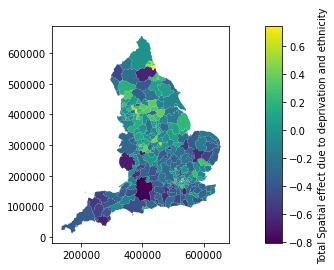

In [51]:

ig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="10%", pad=0.5)


gdf_dbp.plot(column='totl_pr', ax=ax, legend=True, cax=cax,
                          legend_kwds={'label': 'Total Spatial effect due to deprivation and ethnicity', 'orientation':'vertical'})


In [43]:
input_map = {0: 'qexp0', 0.25: 'qexp1', 0.5: 'qexp2', 0.75:'qexp3', 1:'qexp4'}

In [44]:
def json_data(selectedq):
    selected_column = input_map[selectedq]
    #df_q = gdf_dbp['0,0.25,0.5,0.75,1']
    gdf_dbp_df['plot_col'] = gdf_dbp_df['unxp_fr'] + gdf_dbp_df[selected_column]
    
    final_json = json.loads(gdf_dbp_df.to_json())
    json_data = json.dumps(final_json)
    
    return json_data

In [45]:
# Define the callback function: update_plot
def update_plot(attr, old, new):
    # The input q is the year selected from the slider
    q = slider.value
    new_data = json_data(selectedq)
    
    # The input cr is the criteria selected from the select box
    cr = select.value
    input_field = format_df.loc[format_df['verbage'] == cr, 'field'].iloc[0]
    
    # Update the plot based on the changed inputs
    p = make_plot(input_field)
    
    # Update the layout, clear the old document and display the new document
    layout = column(p, widgetbox(select), widgetbox(slider))
    curdoc().clear()
    curdoc().add_root(layout)
    
    # Update the data
    geosource.geojson = new_data
    

    

In [46]:
# Create a plotting function

def make_plot(field_name, min_range = -1, max_range = 1):
    
  #format_df = gdf_dbp_df
  # Set the format of the colorbar
  #min_range = format_df.loc[format_df['field'] == field_name, 'min_range'].iloc[0]
  #max_range = format_df.loc[format_df['field'] == field_name, 'max_range'].iloc[0]
  #field_format = format_df.loc[format_df['field'] == field_name, 'format'].iloc[0]

  # Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
  color_mapper = LinearColorMapper(palette = palette, low = min_range, high = max_range)

  # Create color bar.
  #format_tick = NumeralTickFormatter(format=field_format)
  color_bar = ColorBar(color_mapper=color_mapper, label_standoff=18, 
  border_line_color=None, location = (0, 0))

  # Create figure object.
  #verbage = format_df.loc[format_df['field'] == field_name, 'verbage'].iloc[0]

  p = figure(title = 'spatial deprivation', 
             plot_height = 650, plot_width = 850,
             toolbar_location = None)
  p.xgrid.grid_line_color = None
  p.ygrid.grid_line_color = None
  p.axis.visible = False

  # Add patch renderer to figure. 
  p.patches('xs','ys', source = geosource, fill_color = {'field' : field_name, 'transform' : color_mapper},
             line_color = 'black', line_width = 0.25, fill_alpha = 1)
  
  # Specify color bar layout.
  p.add_layout(color_bar, 'right')

  # Add the hover tool to the graph
  #p.add_tools(hover)
  return p

In [47]:
palette = brewer['Blues'][8]
geosource = GeoJSONDataSource(geojson = json_data(0))


plot_out = make_plot('plot_col')

# Make a slider object: slider 
slider = Slider(title = 'quantile',start = 0, end = 1, step = 0.25, value = 1)
slider.on_change('value', update_plot)

layout = column(plot_out, bokeh.models.Column(slider))
curdoc().add_root(layout)

NameError: name 'p' is not defined

In [ ]:
plot_out

In [ ]:
show(plot_out)

In [ ]:
gdf_dbp_df['plot_col']

In [ ]:
gdf_dbp_df['unxp_fr']

In [ ]:
import folium as folium

In [ ]:
gdf_dbp['exp_frc'] = gdf_dbp['exp_frc'].apply(lambda x: str(x))

In [ ]:
gdf_dbp.crs

In [ ]:
gdf_dbp = gdf_dbp.to_crs(epsg=4326)
print(gdf_dbp.crs)

In [ ]:
x_map=gdf_dbp.centroid.x.mean()
y_map=gdf_dbp.centroid.y.mean()

In [ ]:
x_map=gdf_dbp.centroid.x.mean()
y_map=gdf_dbp.centroid.y.mean()
#x_map=GeoSeries.to_crs(mean_geo_df_geom)

mymap = folium.Map(location=[y_map, x_map], zoom_start=10,tiles=None)
#folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
mymap

m = folium.Map(location = [y_map, x_map], zoom_start = 10)
folium.Choropleth(
    geo_data = gdf_dbp,
    name = 'Choropleth',
    data = gdf_dbp,
    columns = ['LTLA_ID','exp_frc'],
    key_on = 'feature.id',
    fill_color = 'YlGnBu',
    fill_opacity = 0.5,
    line_opacity = 1,
    legend_name = 'e',
    smooth_factor= 0).add_to(m)